# Calcul Numeric - Tema 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Calculul derivatei unei funcții

Funcția dată este
$f(x) = \cos (-0.7 x)$.

Derivata a doua a lui $f$ (calculată simbolic) este
$f''(x) = -0.49 \cdot \cos(0.7 x)$, unde
$x \in \left[- \frac{\pi}{2}, \pi\right]$.

In [2]:
left, right = -np.pi / 2, np.pi

def f(x):
    return np.cos(-0.7 * x)

def f_second_derivative(x):
    return -0.49 * np.cos(0.7 * x)

Construim un interval discretizat cu $N = 212$ puncte echidistante. Am determinat experimental că această valoare este cel mai mic $N$ pentru care eroarea de trunchiere este sub $10^{-5}$.

In [3]:
N = 212
x = np.linspace(left, right, N)

Pentru calcularea derivatei a doua în interiorul intervalului folosesc metoda diferențelor finite centrale.

In [4]:
def f_computed_second_derivative(x):
    h = x[1] - x[0]
    y = f(x)
    y2 = np.zeros(len(y) - 2)
   
    for i in range(1, len(x) - 1):
        y2[i - 1] = (y[i + 1] - 2 * y[i] + y[i - 1]) / (h * h)

    return y2

### Reprezentarea grafică a rezultatului

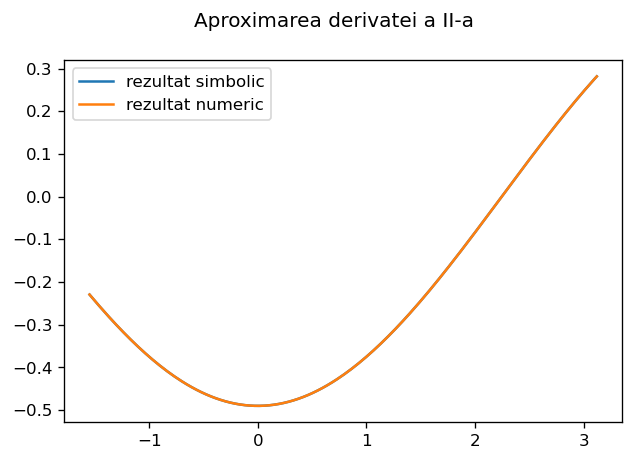

In [5]:
x_interior = x[1:-1]

y_real = f_second_derivative(x_interior)
y_approx = f_computed_second_derivative(x)

plt.figure(dpi=120)
plt.suptitle('Aproximarea derivatei a II-a')
plt.plot(x_interior, y_real, label='rezultat simbolic')
plt.plot(x_interior, y_approx, label='rezultat numeric')
plt.legend()
plt.show()

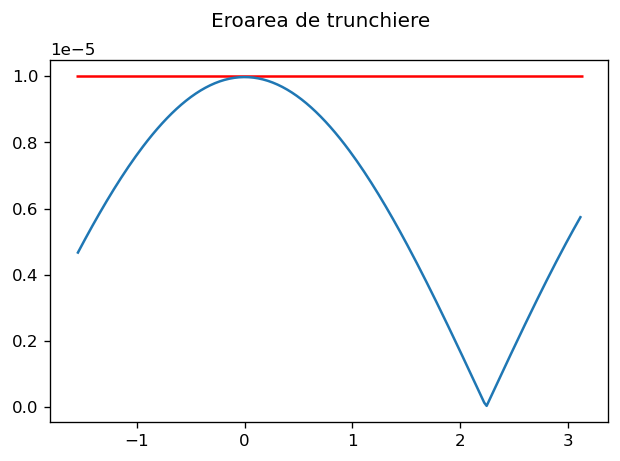

Valoarea maximă a erorii: 9.979730912323959e-06


In [6]:
error = np.abs(y_approx - y_real)

plt.figure(dpi=120)
plt.suptitle('Eroarea de trunchiere')
plt.plot(x_interior, error)
plt.hlines([1e-5], xmin=left, xmax=right, color='red')
plt.show()

print('Valoarea maximă a erorii:', np.max(error))

## Integrare prin formule de cuadratură sumate

### Funcția care calculează valoarea aproximativă a integralei

In [7]:
def integrare(f, x, metoda):
    # Evaluăm funcția în punctele date
    y = f(x)

    h = x[1] - x[0]
    
    if metoda == 'dreptunghi':
        I = 2 * h * np.sum(y[::2])
    elif metoda == 'trapez':
        I = h/2 * (y[0] + 2 * np.sum(y[1:-2]) + y[-1])
    elif metoda == 'simpson':
        I = h/3 * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2]) + y[-1])
    else:
        raise Exception('Metodă necunoscută')

    return I

### Reprezentare grafică

Am folosit funcția de mai sus pentru a calcula integrala funcției $f$ la diferite grade de precizie. Am făcut un grafic pe care arăt cât de repede converg la o valoare diferitele metode.

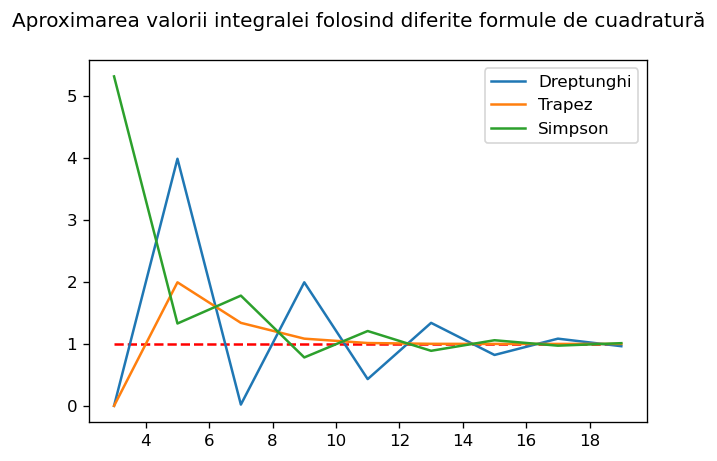

In [8]:
left, right = -16, 16
sigma = 1.6
f = lambda x: 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x ** 2) / (2 * (sigma ** 2)))

N_min = 3
N_max = 20
N_range = range(N_min, N_max, 2)

def eval_metoda(metoda):
    valori_integrala = []
    for N in N_range:
        x = np.linspace(left, right, N)
        I = integrare(f, x, metoda)
        valori_integrala.append(I)
    return valori_integrala

plt.figure(dpi=120)
plt.suptitle('Aproximarea valorii integralei folosind diferite formule de cuadratură')
plt.plot(N_range, eval_metoda('dreptunghi'), label='Dreptunghi')
plt.plot(N_range, eval_metoda('trapez'), label='Trapez')
plt.plot(N_range, eval_metoda('simpson'), label='Simpson')
plt.hlines([1], xmin=N_min, xmax=N_max - 1, linestyle='--', color='red')
plt.legend()
plt.show()

## Bonus: Integrarea simbolică

Fie
$$
I = \int_{-\infty}^{+\infty} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{x^2}{2 \sigma^2}} dx = \frac{1}{\sigma \sqrt{2 \pi}} \int_{-\infty}^{+\infty} e^{-\frac{x^2}{2 \sigma^2}} dx
$$

Deci $I$ este o constantă înmulțită cu o [integrală Gaussiană](https://en.wikipedia.org/wiki/Gaussian_integral).

La cazul general, valoarea acesteia este
$$
\int_{-\infty}^{+\infty} e^{- a x^2} dx = \sqrt{\frac{\pi}{a}}
$$

În cazul nostru, avem $a = \frac{1}{2 \sigma^2}$. Deci
$$
I = \frac{1}{\sigma \sqrt{2 \pi}} \cdot \sqrt{\frac{\pi}{\frac{1}{2 \sigma^2}}} = \frac{1}{\sigma \sqrt{2 \pi}} \cdot \sqrt{\pi \cdot 2 \sigma^2} = \frac{\sigma \sqrt{2 \pi}}{\sigma \sqrt{2 \pi}} = 1
$$

Integrala improprie cerută are valoarea $1$.